In [1]:
import numpy as np
from tqdm import tqdm
from mpc import MPCControl
import matplotlib.pyplot as plt

from visualise import (
    plot_3d_control,
    plot_action_history,
    plot_state_history,
    plot_terminal_cost_lyupanov,
)

import terminal_set

from main import simulate
import scipy.linalg as la

Initial state is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Target state to reach is  [2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Simulating:   0%|          | 0/100 [00:00<?, ?it/s]

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-18


Simulating: 100%|██████████| 100/100 [00:04<00:00, 22.74it/s]
/Users/andrei-carlo/Documents/uni/sc4232312_mpc/mpc_drone/visualise.py:32: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(actual[0, 1], reference[-1, 1])
/Users/andrei-carlo/Documents/uni/sc4232312_mpc/mpc_drone/visualise.py:33: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax.set_zlim(actual[0, 2], reference[-1, 2])


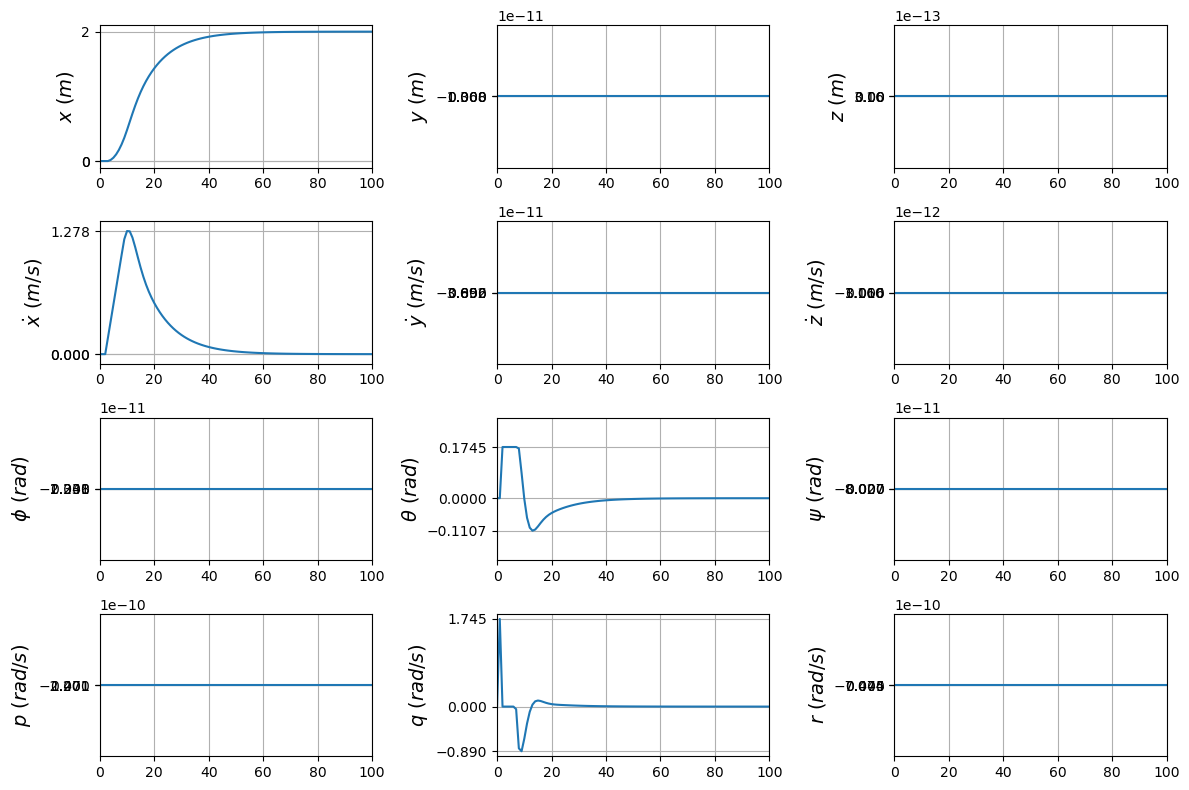

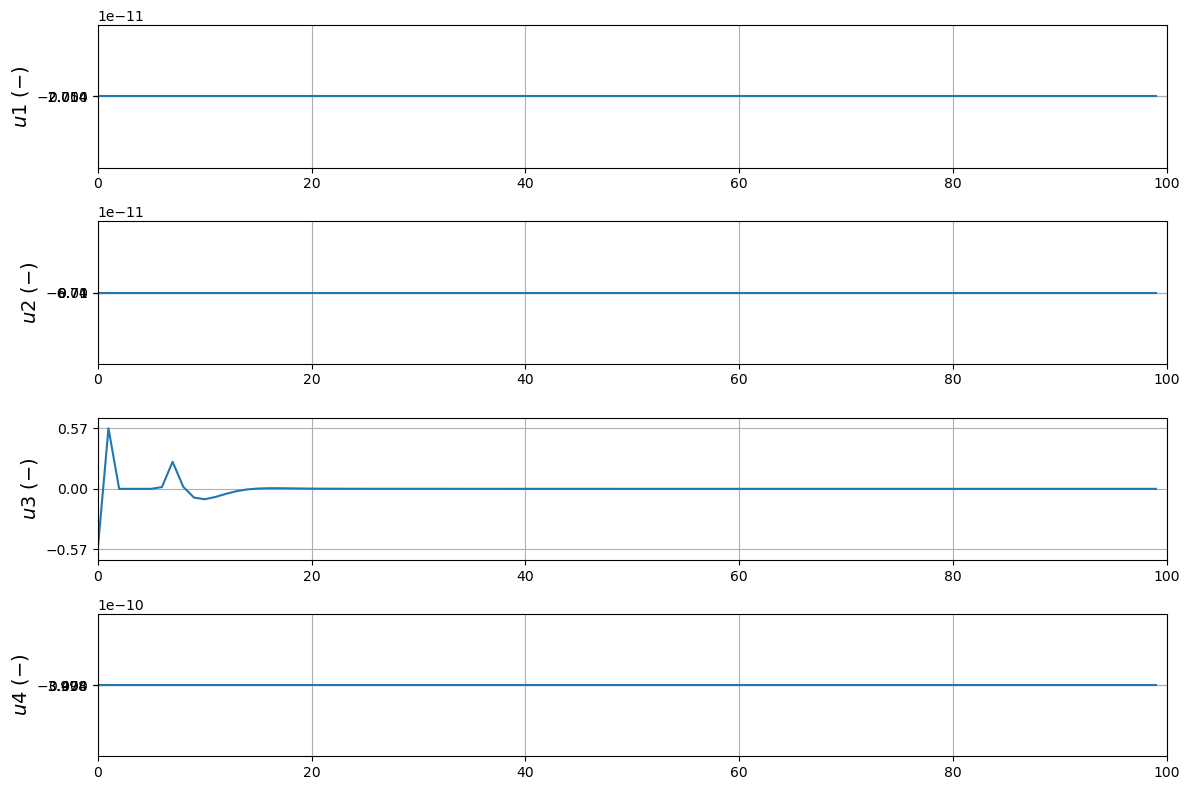

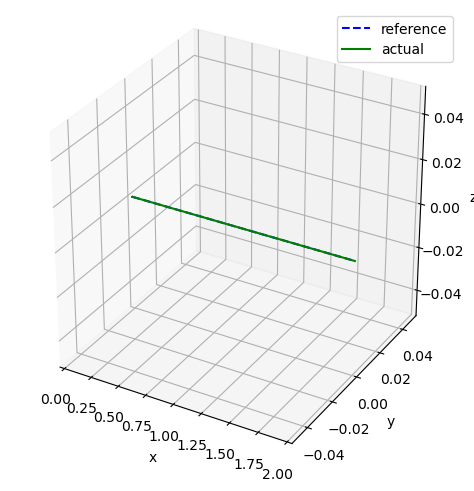

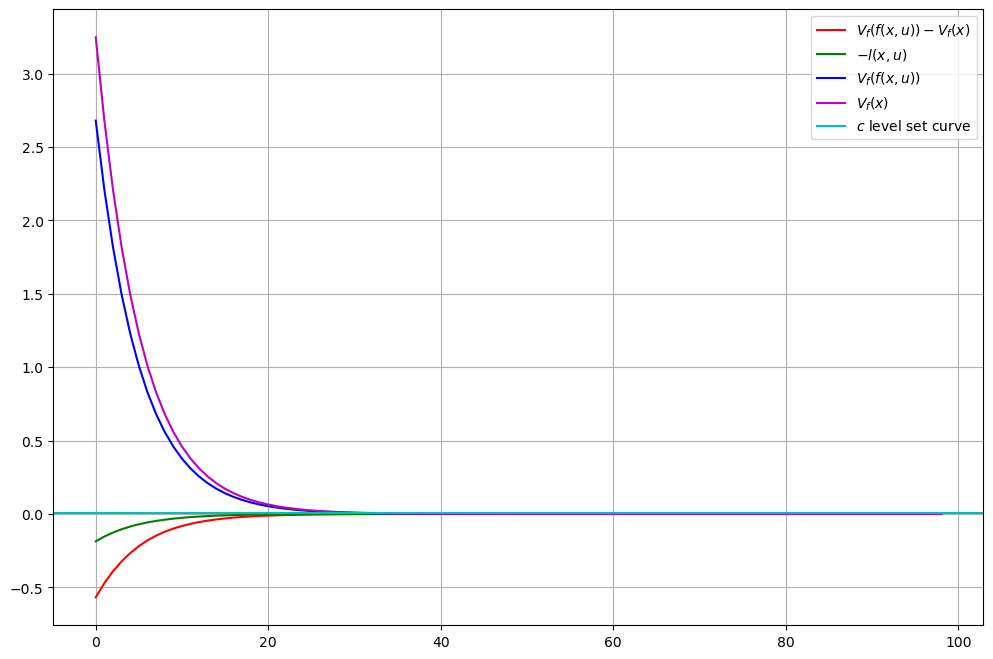

ValueError: too many values to unpack (expected 4)

In [2]:
dt = 0.10  # Sampling period
N = 30  # MPC Horizon
T = 100  # Duration of simulation
x_init = np.zeros(12)  # Initial conditions
x_target = np.zeros(12)  # State to reach
x_target[0:3] = np.array([2.0, 0.0, 0.0])
x_target[3:6] = np.array([0.0, 0.0, 0.0])

print("Initial state is ", x_init)
print("Target state to reach is ", x_target)

 # Controller
ctrl = MPCControl(
    mpc_horizon=N,
    timestep_mpc_stages=dt,
    use_terminal=0,
)

# this also rebuilds mpc problem to include the new constraint
ctrl.c_level = terminal_set.calculate_c(ctrl, x_target)

states, inputs, plans, timesteps, Vf, l = simulate(
    controller=ctrl,
    x_init=x_init,
    x_target=x_target,
    T=T,
    plot=True,
    plots_suffix="_terminal",
)

print("C is ", ctrl.c)
# print(ctrl.problem)


Simulating:   0%|          | 0/100 [00:00<?, ?it/s]

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-18


Simulating: 100%|██████████| 100/100 [00:09<00:00, 10.78it/s]
/Users/andrei-carlo/Documents/uni/sc4232312_mpc/mpc_drone/visualise.py:32: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(actual[0, 1], reference[-1, 1])
/Users/andrei-carlo/Documents/uni/sc4232312_mpc/mpc_drone/visualise.py:33: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax.set_zlim(actual[0, 2], reference[-1, 2])


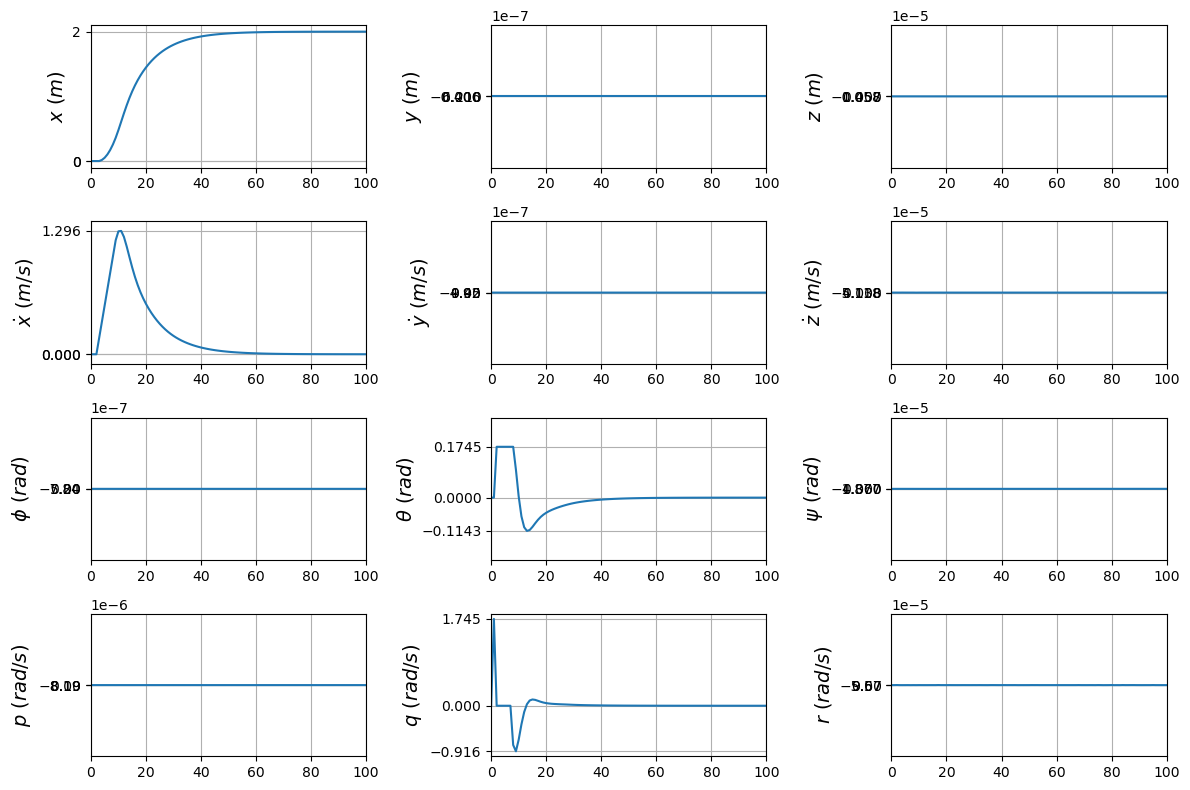

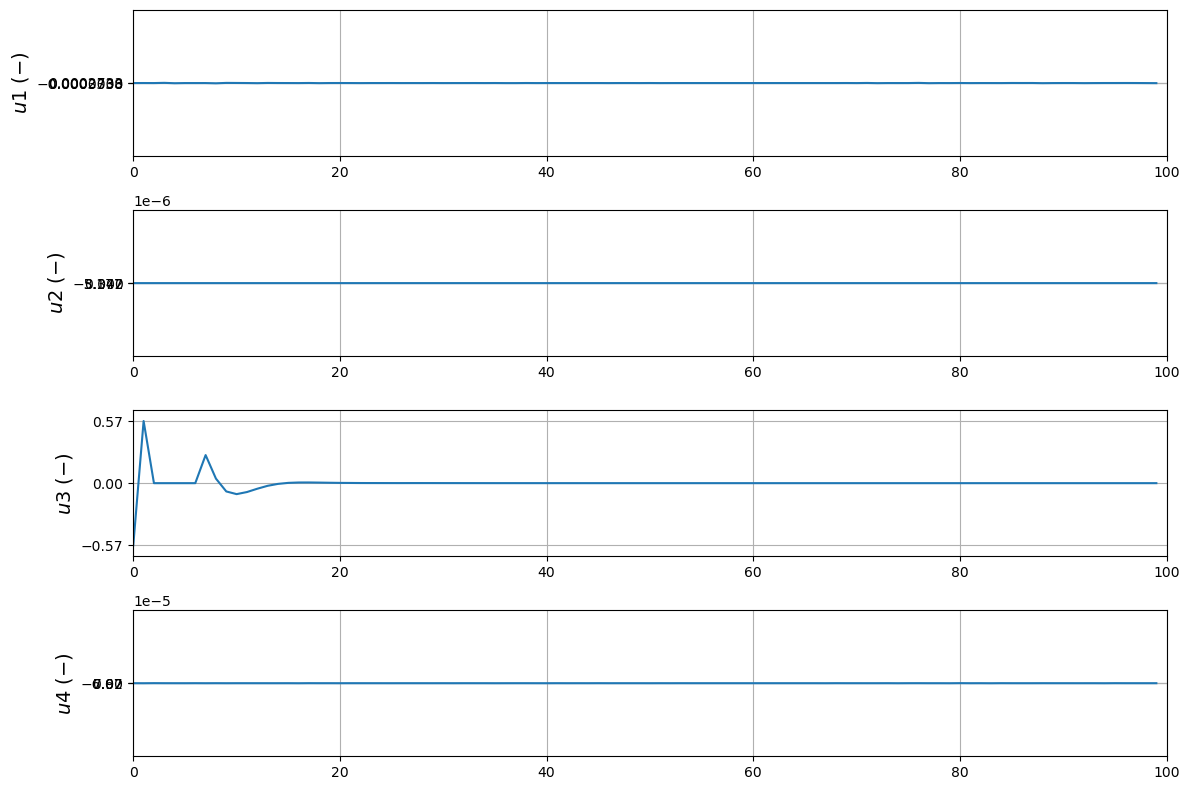

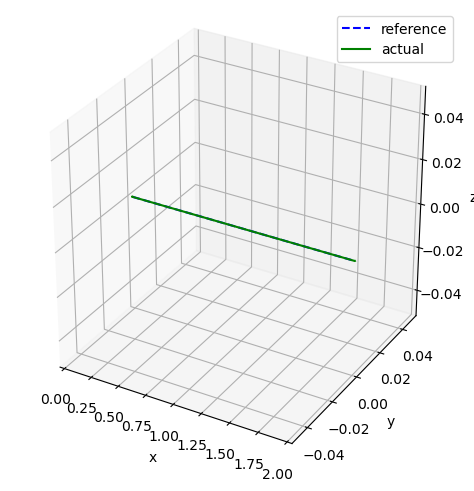

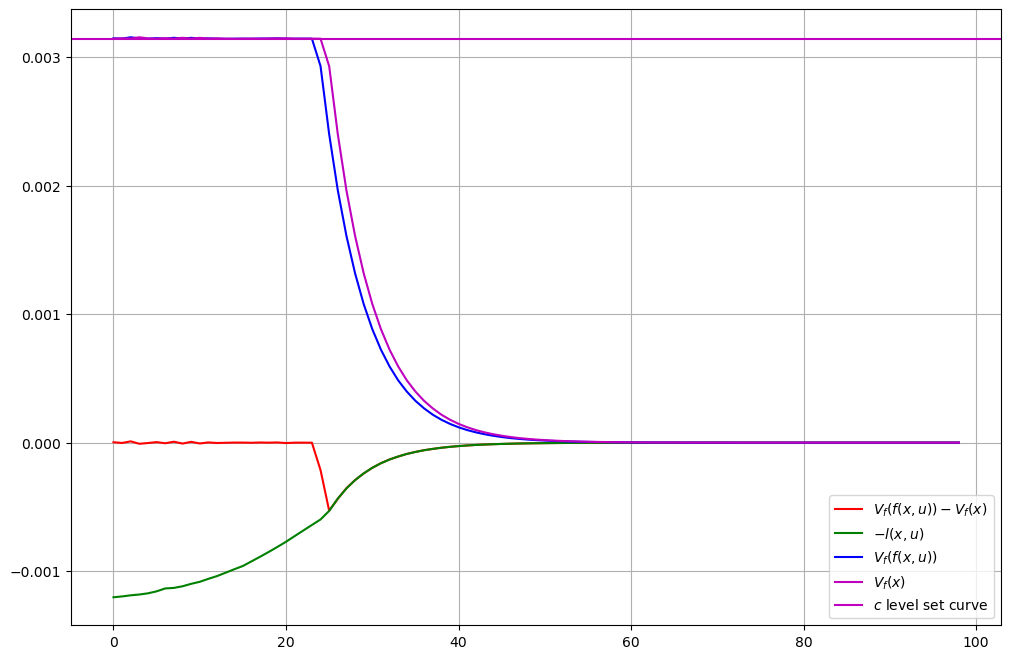

In [3]:
states, inputs, plans, timesteps, Vf, l = simulate(
    controller=ctrl,
    x_init=x_init,
    x_target=x_target,
    dt=dt,
    T=T,
    N=N,
    plot=True,
    use_terminal=ctrl.use_terminal_cost,
)

In [4]:
Vf

array([4.19637763e-03, 4.19533551e-03, 4.19550455e-03, 4.19606289e-03,
       4.21762307e-03, 4.21806998e-03, 4.20392379e-03, 4.19500493e-03,
       4.19993631e-03, 4.19511214e-03, 4.20626015e-03, 4.20230331e-03,
       4.19500422e-03, 4.20078661e-03, 4.23081762e-03, 4.19558980e-03,
       4.19495863e-03, 4.19505755e-03, 4.19539568e-03, 4.19743664e-03,
       4.19530539e-03, 4.19520619e-03, 4.19512803e-03, 4.19537082e-03,
       4.19512481e-03, 4.19510880e-03, 4.19535483e-03, 4.19513521e-03,
       3.67297540e-03, 3.01102569e-03, 2.46508456e-03, 2.01851899e-03,
       1.65048038e-03, 1.35341076e-03, 1.10815170e-03, 9.07528697e-04,
       7.43008543e-04, 6.08432908e-04, 4.98177729e-04, 4.07929901e-04,
       3.33878373e-04, 2.73436131e-04, 2.23884334e-04, 1.82995015e-04,
       1.49749873e-04, 1.22520420e-04, 1.00335774e-04, 8.19635148e-05,
       6.71520278e-05, 5.47694338e-05, 4.47938338e-05, 3.66642572e-05,
       3.02006127e-05, 2.46803960e-05, 2.01797689e-05, 1.64568515e-05,
      

In [36]:
predicted_xn = plans[:, -1, :]
# predicted_xn
x_es = (predicted_xn.T - x_target)

In [47]:
x_es.shape
x_es[:,0]

array([-1.86097885e-02, -1.86411253e-02, -1.86775181e-02, -1.87085449e-02,
       -1.87630253e-02, -1.88013782e-02, -1.89181461e-02, -1.88988621e-02,
       -1.89475735e-02, -1.90318938e-02, -1.90984343e-02, -1.91865687e-02,
       -1.92507774e-02, -1.93173121e-02, -1.94006382e-02, -1.94917604e-02,
       -1.95700397e-02, -1.96552490e-02, -1.97321802e-02, -1.98037798e-02,
       -1.98699720e-02, -1.99211211e-02, -1.99567533e-02, -1.99735773e-02,
       -1.84896575e-02, -1.67301086e-02, -1.51404829e-02, -1.36998908e-02,
       -1.23973557e-02, -1.12187290e-02, -1.01519018e-02, -9.18609215e-03,
       -8.31227194e-03, -7.52104045e-03, -6.80658391e-03, -6.15921574e-03,
       -5.57339392e-03, -5.04309551e-03, -4.56295403e-03, -4.12919549e-03,
       -3.73604542e-03, -3.37926246e-03, -3.05919629e-03, -2.76674284e-03,
       -2.50113737e-03, -2.26367161e-03, -2.04819235e-03, -1.85408432e-03,
       -1.67694403e-03, -1.51662619e-03, -1.37327602e-03, -1.24432671e-03,
       -1.12316186e-03, -

In [39]:
Vf_s = []
for x_e in x_es:
    Vf_s.append(x_e.T @ ctrl.P @ x_e)

Vf_s
    

[0.00419561624377978,
 0.004195492630625523,
 0.0041957980706597104,
 0.004194623078113623,
 0.004198917730335718,
 0.0041964224016406764,
 0.00419631126419597,
 0.004198103165847947,
 0.0041951741771648655,
 0.0041962307183600195,
 0.00419793750748506,
 0.004210694132108177,
 0.0041955727323829285,
 0.004195277104412013,
 0.00419520162469934,
 0.004197223016320559,
 0.004195194178138366,
 0.004195100181444905,
 0.004194779614795826,
 0.004195181344911111,
 0.0041951677545444994,
 0.004195491484234464,
 0.0041956499735327875,
 0.004195297855820344,
 0.003594623157198788,
 0.0029430341602459027,
 0.0024103199205739714,
 0.001973469133048129,
 0.0016160459553249105,
 0.0013233783082083421,
 0.0010836556590946823,
 0.00088728020702225,
 0.0007265052639182327,
 0.0005947768840968073,
 0.00048714388348553375,
 0.0003988888449406245,
 0.0003266162888507339,
 0.00026741907782579623,
 0.00021892660415353632,
 0.00017927936141730222,
 0.00014676666280267103,
 0.00012008496614295477,
 9.84066945

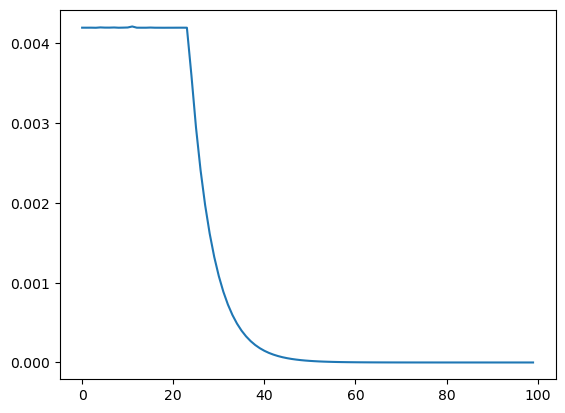

In [44]:
plt.plot(Vf_s[:-1])

In [5]:
k_f = 0.1
m = 0.5
g = 9.81
np.full(4, np.sqrt(m * g / (4 * k_f)))

array([3.50178526, 3.50178526, 3.50178526, 3.50178526])

In [6]:
ctrl.u_op

array([ 6.37432250e+00, -1.35364844e-16, -3.61182506e-16, -1.38777878e-17])